### Visualizing with torchviz

In [1]:
import torch
from torchviz import make_dot
from IPython.display import Image
import sys
import os

# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '../')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))
# for use with subsets
from models.morning_stars_v1.beta.v1_mha_1024_res import TCR_Epitope_Transformer, LazyTCR_Epitope_Dataset, ResidualBlock, Classifier

# Hyperparams (adjust as needed)
embed_dim = 128
num_heads = 8
num_layers = 2
max_tcr_length = 43
max_epitope_length = 43

# Create model instance
model = TCR_Epitope_Transformer(embed_dim=128, num_heads=4, num_layers=2, max_tcr_length=43, max_epitope_length=43, dropout=0.1, classifier_hidden_dim=64)

# Generate dummy input
batch_size = 2
tcr_input = torch.randn(batch_size, max_tcr_length, 1024)
epitope_input = torch.randn(batch_size, max_epitope_length, 1024)

# Forward pass
output = model(tcr_input, epitope_input)

# # Visualize with torchviz
# dot = make_dot(output, params=dict(model.named_parameters()))
# dot.render("diagrams/viz_model_v1_mha_1024", format="png")  # Saves as tcr_epitope_model.png
# Image(filename="diagrams/viz_model_v1_mha_1024.png")


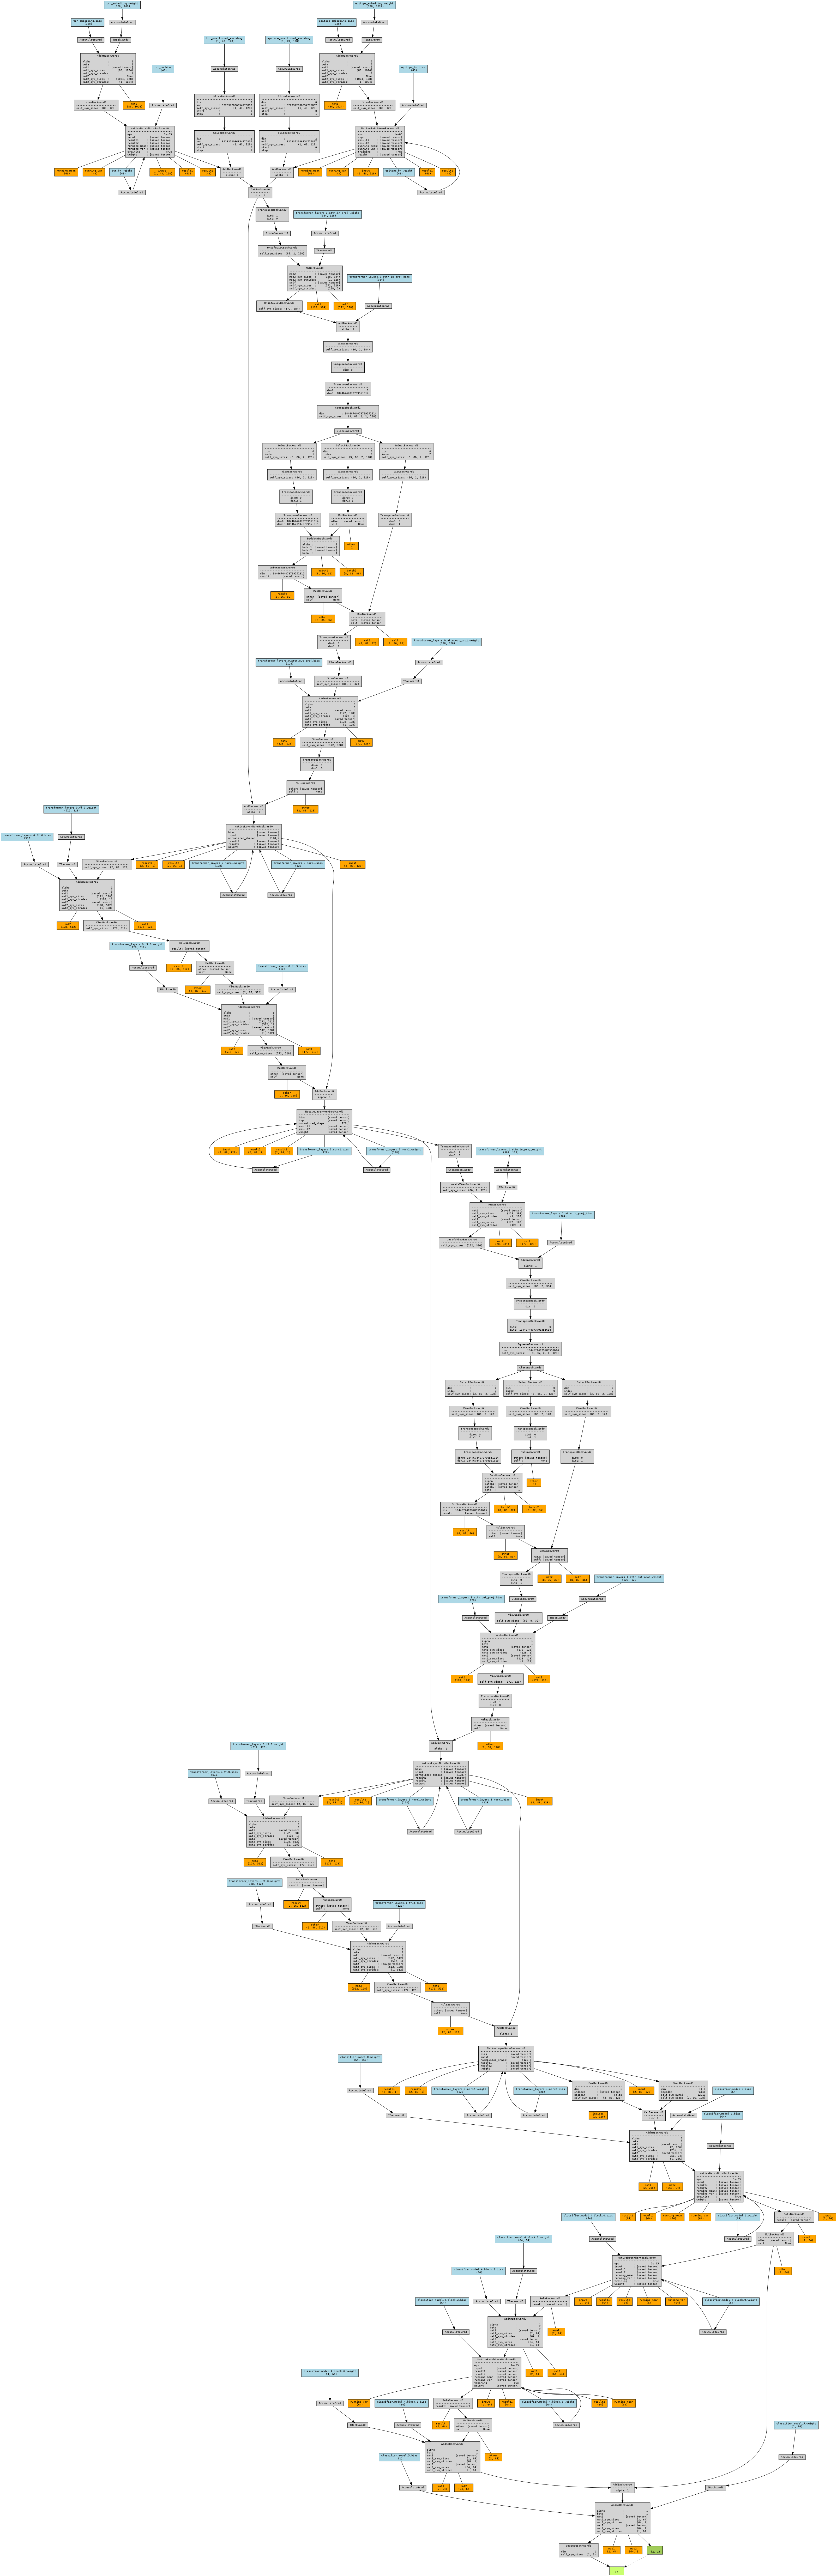

In [11]:
# dot = make_dot(output.detach())
# dot = make_dot(output.detach(), params=dict(model.named_parameters()))
dot = make_dot(output, params=dict(model.named_parameters()), show_attrs=True, show_saved=True)

dot.render("diagrams/viz_model_v1_mha_1024", format="png")  # Saves as tcr_epitope_model.png
Image(filename="diagrams/viz_model_v1_mha_1024.png")

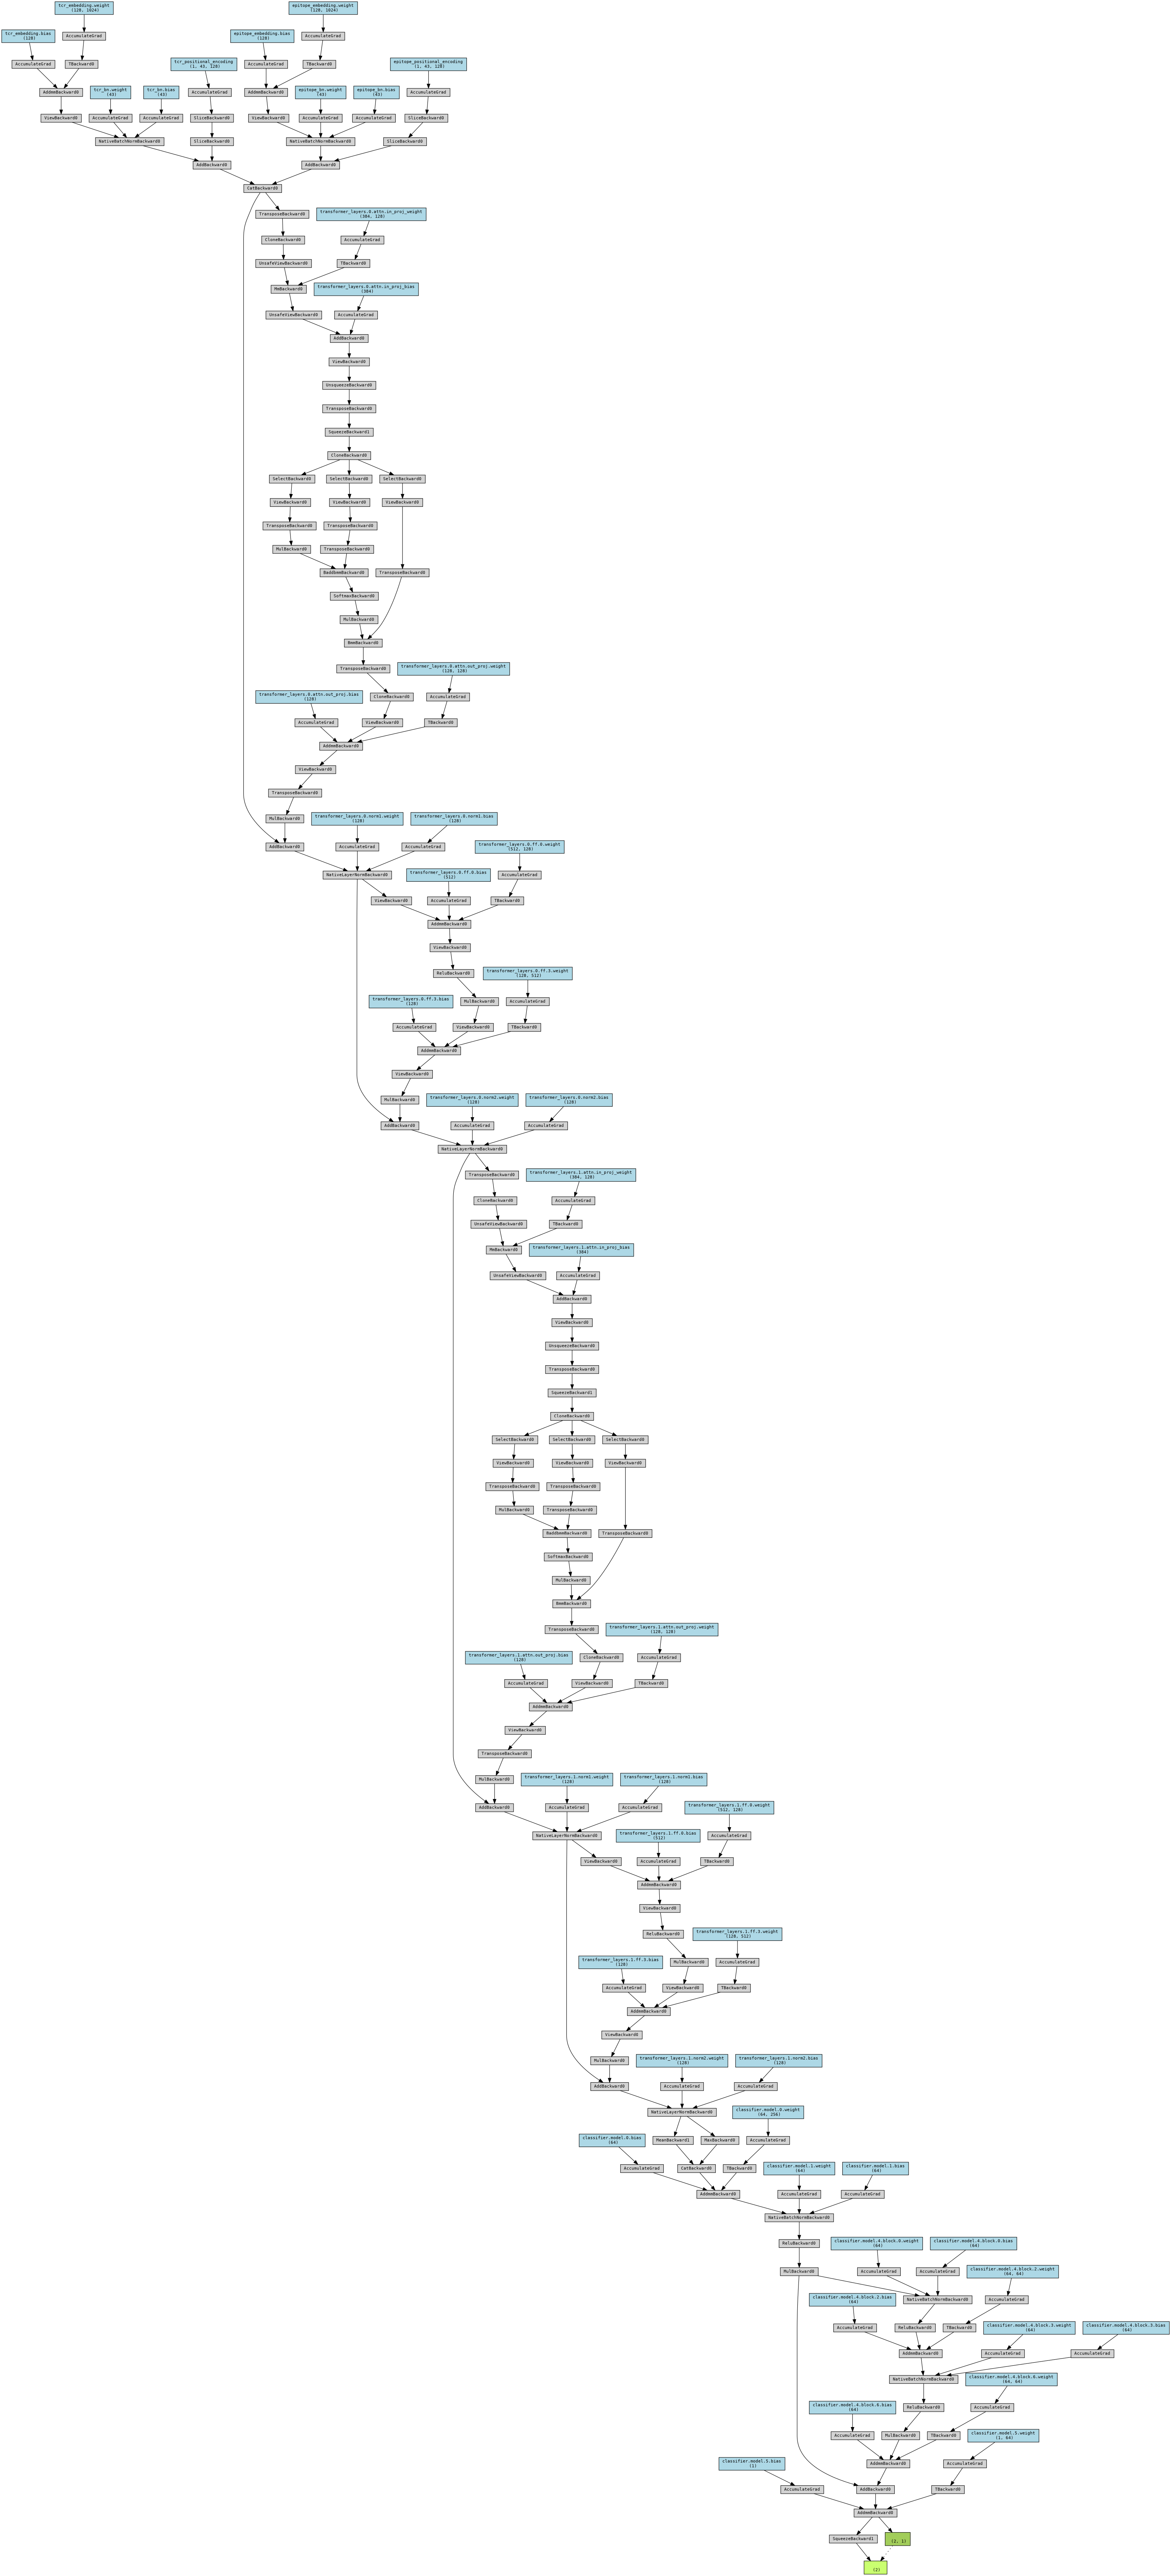

In [6]:
# dot = make_dot(output.detach())
# dot = make_dot(output.detach(), params=dict(model.named_parameters()))
dot = make_dot(output, params=dict(model.named_parameters()), show_attrs=False, show_saved=False)

dot.render("diagrams/viz_model_v1_mha_1024", format="png")  # Saves as tcr_epitope_model.png
Image(filename="diagrams/viz_model_v1_mha_1024.png")

In [8]:
print(dict(model.named_parameters()))
# model.named_modules()

{'tcr_positional_encoding': Parameter containing:
tensor([[[ 0.7575, -0.1056,  1.0499,  ..., -0.4438,  1.6006, -0.6630],
         [ 0.3887,  0.4140, -0.7777,  ...,  1.2514, -0.3879,  1.5419],
         [-0.9336,  0.6093,  0.7747,  ..., -0.7475, -1.3495, -1.5827],
         ...,
         [ 0.1389,  0.6820,  1.2135,  ...,  0.1043, -1.7139, -1.7074],
         [-1.0084,  0.1380,  1.5246,  ..., -1.2351, -2.2056, -1.3070],
         [-1.1365,  0.8026, -1.5764,  ...,  0.1268, -0.1608,  0.5857]]],
       requires_grad=True), 'epitope_positional_encoding': Parameter containing:
tensor([[[-0.9490, -1.7394,  0.4517,  ...,  0.7123, -0.9239,  1.8431],
         [-1.0923, -0.6222,  2.2559,  ..., -0.8033, -0.5378, -1.5776],
         [ 0.1949, -0.6587, -0.8848,  ..., -0.9435,  0.4557, -0.7230],
         ...,
         [ 0.4119, -0.4550, -0.2481,  ...,  1.0745,  0.1812, -0.4981],
         [ 0.3945, -0.1999,  1.6302,  ...,  1.3568,  0.1722, -1.2958],
         [ 0.7987, -1.3938,  0.0779,  ..., -0.9487,  0.382

### Visaulizing with Netron

In [3]:
import torch
import sys
import os
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '../')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))
# for use with subsets
from models.morning_stars_v1.beta.v2_mha_1024_res_more_features import TCR_Epitope_Transformer #, LazyTCR_Epitope_Dataset, ResidualBlock, Classifier

# Define model parameters (adjust if your trained model used different values)
model = TCR_Epitope_Transformer(
    embed_dim=128,
    num_heads=8,
    num_layers=2,
    max_tcr_length=43,
    max_epitope_length=43,
    dropout=0.1,
    classifier_hidden_dim=64,
    trbv_vocab_size=50,
    trbj_vocab_size=20,
    mhc_vocab_size=100
)

# Load model weights if available (optional)
# model.load_state_dict(torch.load('model_weights.pth', map_location='cpu'))

# Put model in evaluation mode
model.eval()


TCR_Epitope_Transformer(
  (tcr_embedding): Linear(in_features=1024, out_features=128, bias=True)
  (epitope_embedding): Linear(in_features=1024, out_features=128, bias=True)
  (trbv_embed): Embedding(50, 128, padding_idx=49)
  (trbj_embed): Embedding(20, 128, padding_idx=19)
  (mhc_embed): Embedding(100, 128, padding_idx=99)
  (tcr_bn): BatchNorm1d(43, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (epitope_bn): BatchNorm1d(43, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (transformer_layers): ModuleList(
    (0-1): 2 x AttentionBlock(
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=128, out_features=128, bias=True)
      )
      (norm1): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout1): Dropout(p=0.1, inplace=False)
      (ff): Sequential(
        (0): Linear(in_features=128, out_features=512, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.1, inplace=False)
       

In [7]:
import torch
# import onnx

# Assuming embed_dim is 128, max_tcr_length is 20, max_epitope_length is 15
embed_dim = 128
max_tcr_length = 43
max_epitope_length = 43

# Create dummy inputs
dummy_tcr = torch.randn(1, max_tcr_length, 1024)  # Batch size of 1
dummy_epitope = torch.randn(1, max_epitope_length, 1024)
dummy_trbv = torch.tensor([[0]])  # Example index
dummy_trbj = torch.tensor([[0]])  # Example index
dummy_mhc = torch.tensor([[0]])   # Example index

# Export the model
torch.onnx.export(model, 
                  (dummy_tcr, dummy_epitope, dummy_trbv, dummy_trbj, dummy_mhc), 
                  "TCR_Epitope_Transformer.onnx",
                  input_names=['tcr', 'epitope', 'trbv', 'trbj', 'mhc'],
                  output_names=['output'],
                  dynamic_axes={'tcr': {0: 'batch_size'}, 
                                'epitope': {0: 'batch_size'}, 
                                'trbv': {0: 'batch_size'}, 
                                'trbj': {0: 'batch_size'}, 
                                'mhc': {0: 'batch_size'},
                                'output': {0: 'batch_size'}})


In [8]:
import netron
netron.start("TCR_Epitope_Transformer.onnx")


Serving 'TCR_Epitope_Transformer.onnx' at http://localhost:8080


('localhost', 8080)

In [ ]:
# in notebook

from IPython.display import Image
Image(filename="diagrams/viz_model_v1_mha_1024.png")


In [9]:
import onnx

# Load the exported ONNX model
model_onnx = onnx.load("TCR_Epitope_Transformer.onnx")

# Check if the model is well-formed
onnx.checker.check_model(model_onnx)

# Print a human-readable graph
print(onnx.helper.printable_graph(model_onnx.graph))


graph main_graph (
  %tcr[FLOAT, batch_sizex43x1024]
  %epitope[FLOAT, batch_sizex43x1024]
  %trbv[INT64, batch_sizex1]
  %trbj[INT64, batch_sizex1]
  %mhc[INT64, batch_sizex1]
) initializers (
  %tcr_positional_encoding[FLOAT, 1x43x128]
  %epitope_positional_encoding[FLOAT, 1x43x128]
  %tcr_embedding.bias[FLOAT, 128]
  %epitope_embedding.bias[FLOAT, 128]
  %trbv_embed.weight[FLOAT, 50x128]
  %trbj_embed.weight[FLOAT, 20x128]
  %mhc_embed.weight[FLOAT, 100x128]
  %tcr_bn.weight[FLOAT, 43]
  %tcr_bn.bias[FLOAT, 43]
  %transformer_layers.0.attn.in_proj_bias[FLOAT, 384]
  %transformer_layers.0.attn.out_proj.weight[FLOAT, 128x128]
  %transformer_layers.0.attn.out_proj.bias[FLOAT, 128]
  %transformer_layers.0.norm1.weight[FLOAT, 128]
  %transformer_layers.0.ff.0.bias[FLOAT, 512]
  %transformer_layers.0.ff.3.bias[FLOAT, 128]
  %transformer_layers.1.attn.out_proj.weight[FLOAT, 128x128]
  %transformer_layers.1.ff.0.bias[FLOAT, 512]
  %transformer_layers.1.ff.3.bias[FLOAT, 128]
  %classifier.mo

### Visaulizing with Graphviz

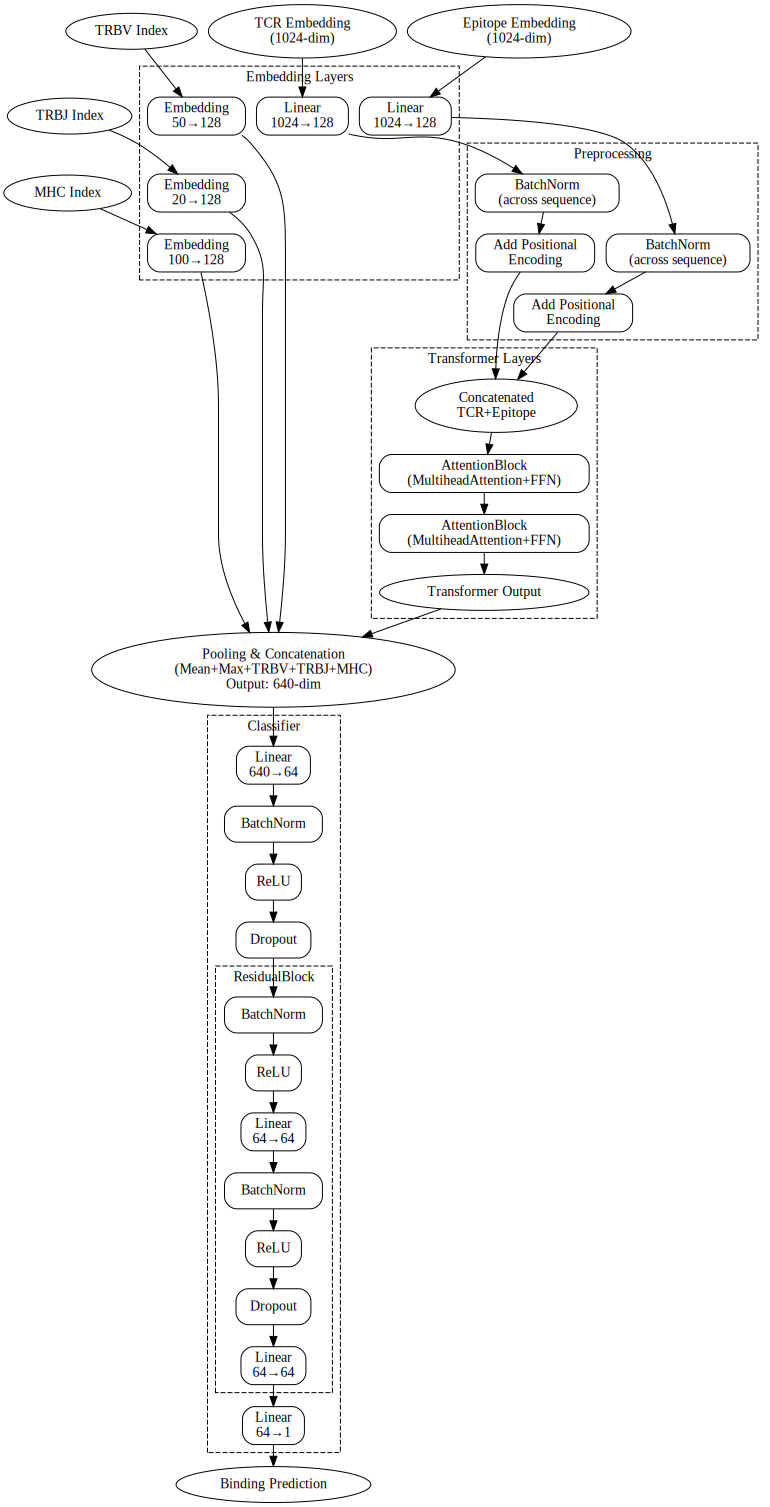

In [11]:
from graphviz import Digraph

dot = Digraph(comment='TCR_Epitope_Transformer', format='png')
dot.attr(rankdir='TB', nodesep='0.15', ranksep='0.3') 
dot.node_attr.update(shape='box', style='rounded')

# Inputs
with dot.subgraph() as s:
    s.attr('node', shape='oval')
    s.node('TCR_Embedding', 'TCR Embedding\n(1024-dim)')
    s.node('Epitope_Embedding', 'Epitope Embedding\n(1024-dim)')
    s.node('TRBV', 'TRBV Index')
    s.node('TRBJ', 'TRBJ Index')
    s.node('MHC', 'MHC Index')

# Embedding Layers
with dot.subgraph(name='cluster_embeddings') as s:
    s.attr(label='Embedding Layers', style='dashed')
    s.node('TCR_Linear', 'Linear\n1024→128')
    s.node('Epitope_Linear', 'Linear\n1024→128')
    s.node('TRBV_Embed', 'Embedding\n50→128')
    s.node('TRBJ_Embed', 'Embedding\n20→128')
    s.node('MHC_Embed', 'Embedding\n100→128')

# Normalization and Positional Encoding
with dot.subgraph(name='cluster_preprocessing') as s:
    s.attr(label='Preprocessing', style='dashed')
    s.node('TCR_BN', 'BatchNorm\n(across sequence)')
    s.node('Epitope_BN', 'BatchNorm\n(across sequence)')
    s.node('TCR_Pos', 'Add Positional\nEncoding')
    s.node('Epitope_Pos', 'Add Positional\nEncoding')

# Transformer Layers
with dot.subgraph(name='cluster_transformer') as s:
    s.attr(label='Transformer Layers', style='dashed')
    s.node('Transformer_Start', 'Concatenated\nTCR+Epitope', shape='ellipse')
    s.node('Transformer_Layer1', 'AttentionBlock\n(MultiheadAttention+FFN)')
    s.node('Transformer_Layer2', 'AttentionBlock\n(MultiheadAttention+FFN)')
    s.node('Transformer_End', 'Transformer Output', shape='ellipse')

# Pooling and Concatenation
dot.node('Pooling', 'Pooling & Concatenation\n(Mean+Max+TRBV+TRBJ+MHC)\nOutput: 640-dim', shape='ellipse')

# Classifier
with dot.subgraph(name='cluster_classifier') as s:
    s.attr(label='Classifier', style='dashed')
    s.node('Classifier_Linear1', 'Linear\n640→64')
    s.node('Classifier_BN', 'BatchNorm')
    s.node('Classifier_ReLU', 'ReLU')
    s.node('Classifier_Dropout', 'Dropout')
    
    with s.subgraph(name='cluster_residual') as ss:
        ss.attr(label='ResidualBlock', style='dashed')
        ss.node('Res_BN1', 'BatchNorm')
        ss.node('Res_ReLU1', 'ReLU')
        ss.node('Res_Linear1', 'Linear\n64→64')
        ss.node('Res_BN2', 'BatchNorm')
        ss.node('Res_ReLU2', 'ReLU')
        ss.node('Res_Dropout', 'Dropout')
        ss.node('Res_Linear2', 'Linear\n64→64')
    
    s.node('Classifier_Linear2', 'Linear\n64→1')

# Output
dot.node('Output', 'Binding Prediction', shape='oval')

# Connections
dot.edges([
    ('TCR_Embedding', 'TCR_Linear'),
    ('Epitope_Embedding', 'Epitope_Linear'),
    ('TRBV', 'TRBV_Embed'),
    ('TRBJ', 'TRBJ_Embed'),
    ('MHC', 'MHC_Embed'),
    ('TCR_Linear', 'TCR_BN'),
    ('Epitope_Linear', 'Epitope_BN'),
    ('TCR_BN', 'TCR_Pos'),
    ('Epitope_BN', 'Epitope_Pos'),
    ('TCR_Pos', 'Transformer_Start'),
    ('Epitope_Pos', 'Transformer_Start'),
    ('Transformer_Start', 'Transformer_Layer1'),
    ('Transformer_Layer1', 'Transformer_Layer2'),
    ('Transformer_Layer2', 'Transformer_End'),
    ('Transformer_End', 'Pooling'),
    ('TRBV_Embed', 'Pooling'),
    ('TRBJ_Embed', 'Pooling'),
    ('MHC_Embed', 'Pooling'),
    ('Pooling', 'Classifier_Linear1'),
    ('Classifier_Linear1', 'Classifier_BN'),
    ('Classifier_BN', 'Classifier_ReLU'),
    ('Classifier_ReLU', 'Classifier_Dropout'),
    ('Classifier_Dropout', 'Res_BN1'),
    ('Res_BN1', 'Res_ReLU1'),
    ('Res_ReLU1', 'Res_Linear1'),
    ('Res_Linear1', 'Res_BN2'),
    ('Res_BN2', 'Res_ReLU2'),
    ('Res_ReLU2', 'Res_Dropout'),
    ('Res_Dropout', 'Res_Linear2'),
    ('Res_Linear2', 'Classifier_Linear2'),
    ('Classifier_Linear2', 'Output')
])

# Add invisible edges for layout
dot.edge('TCR_Pos', 'Epitope_Pos', style='invis')
dot.edge('TRBV_Embed', 'TRBJ_Embed', style='invis')
dot.edge('TRBJ_Embed', 'MHC_Embed', style='invis')

# Display the graph
dot

### Visualizing with TensorBoard

In [2]:
import torch
from torch.utils.tensorboard import SummaryWriter
import sys
import os
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '../')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))
# for use with subsets
from models.morning_stars_v1.beta.v1_mha_1024_res import TCR_Epitope_Transformer

# Initialize model
model = TCR_Epitope_Transformer(
    embed_dim=128,
    num_heads=4,
    num_layers=2,
    max_tcr_length=43,
    max_epitope_length=43,
    dropout=0.1,
    classifier_hidden_dim=64
)

# Create dummy input (adjust dimensions as needed)
batch_size = 2
tcr_dummy = torch.randn(batch_size, 43, 1024)  # (batch, max_tcr_length, 1024)
epitope_dummy = torch.randn(batch_size, 43, 1024)  # (batch, max_epitope_length, 1024)

# Initialize TensorBoard writer
writer = SummaryWriter(log_dir="runs/tcr_epitope_model")

# Add model graph to TensorBoard
writer.add_graph(model, (tcr_dummy, epitope_dummy))
writer.close()  # Ensure data is flushed

TracingCheckError: Tracing failed sanity checks!
ERROR: Graphs differed across invocations!
	Graph diff:
		  graph(%self.1 : __torch__.models.morning_stars_v1.beta.v1_mha_1024_res.TCR_Epitope_Transformer,
		        %tcr : Tensor,
		        %epitope : Tensor):
		    %classifier : __torch__.models.morning_stars_v1.beta.v1_mha_1024_res.Classifier = prim::GetAttr[name="classifier"](%self.1)
		    %transformer_layers : __torch__.torch.nn.modules.container.ModuleList = prim::GetAttr[name="transformer_layers"](%self.1)
		    %_1.5 : __torch__.models.morning_stars_v1.beta.v1_mha_1024_res.AttentionBlock = prim::GetAttr[name="1"](%transformer_layers)
		    %transformer_layers.1 : __torch__.torch.nn.modules.container.ModuleList = prim::GetAttr[name="transformer_layers"](%self.1)
		    %_0.3 : __torch__.models.morning_stars_v1.beta.v1_mha_1024_res.AttentionBlock = prim::GetAttr[name="0"](%transformer_layers.1)
		    %epitope_positional_encoding : Tensor = prim::GetAttr[name="epitope_positional_encoding"](%self.1)
		    %tcr_positional_encoding : Tensor = prim::GetAttr[name="tcr_positional_encoding"](%self.1)
		    %epitope_bn : __torch__.torch.nn.modules.batchnorm.BatchNorm1d = prim::GetAttr[name="epitope_bn"](%self.1)
		    %tcr_bn : __torch__.torch.nn.modules.batchnorm.BatchNorm1d = prim::GetAttr[name="tcr_bn"](%self.1)
		    %epitope_embedding : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="epitope_embedding"](%self.1)
		    %tcr_embedding : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="tcr_embedding"](%self.1)
		    %bias.19 : Tensor = prim::GetAttr[name="bias"](%tcr_embedding)
		    %weight.19 : Tensor = prim::GetAttr[name="weight"](%tcr_embedding)
		    %input.1 : Tensor = aten::linear(%tcr, %weight.19, %bias.19), scope: __module.tcr_embedding # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		    %bias.21 : Tensor = prim::GetAttr[name="bias"](%epitope_embedding)
		    %weight.21 : Tensor = prim::GetAttr[name="weight"](%epitope_embedding)
		    %input.3 : Tensor = aten::linear(%epitope, %weight.21, %bias.21), scope: __module.epitope_embedding # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		    %101 : bool = prim::Constant[value=1](), scope: __module.tcr_bn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		    %102 : float = prim::Constant[value=1.0000000000000001e-05](), scope: __module.tcr_bn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		    %103 : float = prim::Constant[value=0.10000000000000001](), scope: __module.tcr_bn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		    %104 : bool = prim::Constant[value=0](), scope: __module.tcr_bn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		    %running_var.11 : Tensor = prim::GetAttr[name="running_var"](%tcr_bn)
		    %running_mean.11 : Tensor = prim::GetAttr[name="running_mean"](%tcr_bn)
		    %bias.23 : Tensor = prim::GetAttr[name="bias"](%tcr_bn)
		    %weight.23 : Tensor = prim::GetAttr[name="weight"](%tcr_bn)
		    %tcr_emb.1 : Tensor = aten::batch_norm(%input.1, %weight.23, %bias.23, %running_mean.11, %running_var.11, %104, %103, %102, %101), scope: __module.tcr_bn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		    %110 : bool = prim::Constant[value=1](), scope: __module.epitope_bn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		    %111 : float = prim::Constant[value=1.0000000000000001e-05](), scope: __module.epitope_bn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		    %112 : float = prim::Constant[value=0.10000000000000001](), scope: __module.epitope_bn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		    %113 : bool = prim::Constant[value=0](), scope: __module.epitope_bn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		    %running_var.13 : Tensor = prim::GetAttr[name="running_var"](%epitope_bn)
		    %running_mean.13 : Tensor = prim::GetAttr[name="running_mean"](%epitope_bn)
		    %bias.25 : Tensor = prim::GetAttr[name="bias"](%epitope_bn)
		    %weight.25 : Tensor = prim::GetAttr[name="weight"](%epitope_bn)
		    %epitope_emb.1 : Tensor = aten::batch_norm(%input.3, %weight.25, %bias.25, %running_mean.13, %running_var.13, %113, %112, %111, %110), scope: __module.epitope_bn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		    %18 : int = prim::Constant[value=-1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:117:0
		    %19 : int[] = prim::ListConstruct(%18)
		    %20 : bool = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:117:0
		    %21 : NoneType = prim::Constant()
		    %22 : Tensor = aten::sum(%tcr, %19, %20, %21) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:117:0
		    %23 : int = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:117:0
		    %tcr_mask : Tensor = aten::eq(%22, %23) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:117:0
		    %25 : int = prim::Constant[value=-1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:118:0
		    %26 : int[] = prim::ListConstruct(%25)
		    %27 : bool = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:118:0
		    %28 : NoneType = prim::Constant()
		    %29 : Tensor = aten::sum(%epitope, %26, %27, %28) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:118:0
		    %30 : int = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:118:0
		    %epitope_mask : Tensor = aten::eq(%29, %30) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:118:0
		    %32 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %33 : int = aten::size(%tcr_emb.1, %32) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %34 : Tensor = prim::NumToTensor(%33)
		    %35 : int = aten::Int(%34)
		    %36 : int = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %37 : int = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %38 : int = prim::Constant[value=9223372036854775807]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %39 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %40 : Tensor = aten::slice(%tcr_positional_encoding, %36, %37, %38, %39) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %41 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %42 : int = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %43 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %44 : Tensor = aten::slice(%40, %41, %42, %35, %43) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %45 : int = prim::Constant[value=2]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %46 : int = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %47 : int = prim::Constant[value=9223372036854775807]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %48 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %49 : Tensor = aten::slice(%44, %45, %46, %47, %48) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %50 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %tcr_emb : Tensor = aten::add_(%tcr_emb.1, %49, %50) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:121:0
		    %52 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %53 : int = aten::size(%epitope_emb.1, %52) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %54 : Tensor = prim::NumToTensor(%53)
		    %55 : int = aten::Int(%54)
		    %56 : int = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %57 : int = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %58 : int = prim::Constant[value=9223372036854775807]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %59 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %60 : Tensor = aten::slice(%epitope_positional_encoding, %56, %57, %58, %59) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %61 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %62 : int = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %63 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %64 : Tensor = aten::slice(%60, %61, %62, %55, %63) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %65 : int = prim::Constant[value=2]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %66 : int = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %67 : int = prim::Constant[value=9223372036854775807]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %68 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %69 : Tensor = aten::slice(%64, %65, %66, %67, %68) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %70 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %epitope_emb : Tensor = aten::add_(%epitope_emb.1, %69, %70) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:122:0
		    %72 : Tensor[] = prim::ListConstruct(%tcr_emb, %epitope_emb)
		    %73 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:125:0
		    %query.1 : Tensor = aten::cat(%72, %73) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:125:0
		    %75 : Tensor[] = prim::ListConstruct(%tcr_mask, %epitope_mask)
		    %76 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:126:0
		    %mask : Tensor = aten::cat(%75, %76) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:126:0
		-   %119 : int = prim::Constant[value=128](), scope: __module.transformer_layers.0/__module.transformer_layers.0.norm1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		-   %120 : float = prim::Constant[value=1.0000000000000001e-05](), scope: __module.transformer_layers.0/__module.transformer_layers.0.norm1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		?     ^^^^^^^^^^
		+   %119 : float = prim::Constant[value=1.0000000000000001e-05](), scope: __module.transformer_layers.0/__module.transformer_layers.0.norm1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		?     ^^^^^^^^^^
		-   %121 : bool = prim::Constant[value=1](), scope: __module.transformer_layers.0/__module.transformer_layers.0.norm1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		-   %122 : float = prim::Constant[value=0.10000000000000001](), scope: __module.transformer_layers.0/__module.transformer_layers.0.dropout1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?      ^^^^^^^^^
		+   %120 : float = prim::Constant[value=0.10000000000000001](), scope: __module.transformer_layers.0/__module.transformer_layers.0.dropout1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?      ^^^^^^^^^
		-   %123 : int = prim::Constant[value=6](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?      ^
		+   %121 : int = prim::Constant[value=6](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?      ^
		-   %124 : NoneType = prim::Constant(), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		?      ^
		+   %122 : NoneType = prim::Constant(), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		?      ^
		-   %125 : bool = prim::Constant[value=0](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?      ^
		+   %123 : bool = prim::Constant[value=0](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?      ^
		-   %126 : float = prim::Constant[value=-inf](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?      ^^^^^^^^^
		+   %124 : float = prim::Constant[value=-inf](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?      ^^^^^^^^^
		+   %125 : int = prim::Constant[value=128](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1308:0
		+   %126 : int = prim::Constant[value=4](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1308:0
		-   %127 : int = prim::Constant[value=1](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1334:0
		?          ^^^                                                                                                                                                                                          ^^
		+   %127 : bool = prim::Constant[value=1](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1308:0
		?          ^^^^                                                                                                                                                                                          ^^
		-   %128 : int = prim::Constant[value=0](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1334:0
		?                                     ^                                                                                                                                                                 ^^
		+   %128 : int = prim::Constant[value=1](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1308:0
		?                                     ^                                                                                                                                                                 ^^
		-   %129 : int = prim::Constant[value=2](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6030:0
		-   %130 : Tensor = prim::Constant[value={4}](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6074:0
		-   %131 : str = prim::Constant[value="trunc"](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6074:0
		-   %132 : int = prim::Constant[value=-1](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5497:0
		-   %133 : int = prim::Constant[value=3](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/_tensor.py:1376:0
		-   %134 : int = prim::Constant[value=-2](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5506:0
		-   %135 : int = prim::Constant[value=4](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6212:0
		-   %136 : Tensor = prim::Constant[value={0.176777}](), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6230:0
		    %norm2.1 : __torch__.torch.nn.modules.normalization.LayerNorm = prim::GetAttr[name="norm2"](%_0.3)
		    %dropout2.1 : __torch__.torch.nn.modules.dropout.Dropout = prim::GetAttr[name="dropout2"](%_0.3)
		    %ff.1 : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="ff"](%_0.3)
		    %norm1.1 : __torch__.torch.nn.modules.normalization.LayerNorm = prim::GetAttr[name="norm1"](%_0.3)
		    %dropout1.1 : __torch__.torch.nn.modules.dropout.Dropout = prim::GetAttr[name="dropout1"](%_0.3)
		    %attn.1 : __torch__.torch.nn.modules.activation.MultiheadAttention = prim::GetAttr[name="attn"](%_0.3)
		    %out_proj.3 : __torch__.torch.nn.modules.linear.NonDynamicallyQuantizableLinear = prim::GetAttr[name="out_proj"](%attn.1)
		    %bias.27 : Tensor = prim::GetAttr[name="bias"](%out_proj.3)
		    %out_proj.1 : __torch__.torch.nn.modules.linear.NonDynamicallyQuantizableLinear = prim::GetAttr[name="out_proj"](%attn.1)
		    %weight.27 : Tensor = prim::GetAttr[name="weight"](%out_proj.1)
		    %in_proj_bias.1 : Tensor = prim::GetAttr[name="in_proj_bias"](%attn.1)
		    %in_proj_weight.1 : Tensor = prim::GetAttr[name="in_proj_weight"](%attn.1)
		-   %149 : Tensor = aten::zeros_like(%mask, %123, %124, %124, %125, %124), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?      ^^^                                           ^^^^^^^^^^^^^^^^^^^
		+   %141 : Tensor = aten::zeros_like(%mask, %121, %122, %122, %123, %122), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?      ^^^                                  ++++++++++++++++++         ^
		-   %key_padding_mask.1 : Tensor = aten::masked_fill_(%149, %mask, %126), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?                                                        ^            ^
		+   %key_padding_mask.1 : Tensor = aten::masked_fill_(%141, %mask, %124), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?                                                        ^            ^
		+   %input.5 : Tensor, %144 : Tensor = aten::_native_multi_head_attention(%query.1, %query.1, %query.1, %125, %126, %in_proj_weight.1, %in_proj_bias.1, %weight.27, %bias.27, %key_padding_mask.1, %127, %127, %128), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1308:0
		-   %query.3 : Tensor = aten::transpose(%query.1, %127, %128), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1334:0
		-   %152 : int = aten::size(%query.3, %128), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6030:0
		-   %tgt_len.1 : Tensor = prim::NumToTensor(%152), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %154 : int = aten::size(%query.3, %127), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6030:0
		-   %bsz.1 : Tensor = prim::NumToTensor(%154), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %156 : int = aten::size(%query.3, %129), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6030:0
		-   %embed_dim.1 : Tensor = prim::NumToTensor(%156), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %head_dim.1 : Tensor = aten::div(%embed_dim.1, %130, %131), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6074:0
		-   %159 : int = aten::Int(%head_dim.1), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %160 : int = aten::Int(%head_dim.1), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %161 : int = aten::Int(%head_dim.1), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %162 : int = aten::size(%query.3, %132), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5497:0
		-   %163 : Tensor = aten::linear(%query.3, %in_proj_weight.1, %in_proj_bias.1), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5501:0
		-   %164 : int[] = prim::ListConstruct(%133, %162), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %165 : Tensor = aten::unflatten(%163, %132, %164), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/_tensor.py:1376:0
		-   %166 : Tensor = aten::unsqueeze(%165, %128), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5505:0
		-   %167 : Tensor = aten::transpose(%166, %128, %134), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5506:0
		-   %168 : Tensor = aten::squeeze(%167, %134), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5507:0
		-   %proj.1 : Tensor = aten::contiguous(%168, %128), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5508:0
		-   %q.1 : Tensor = aten::select(%proj.1, %128, %128), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5510:0
		-   %k.1 : Tensor = aten::select(%proj.1, %128, %127), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5510:0
		-   %v.1 : Tensor = aten::select(%proj.1, %128, %129), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5510:0
		-   %173 : Tensor = aten::mul(%bsz.1, %130), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6163:0
		-   %174 : int = aten::Int(%173), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %175 : int[] = prim::ListConstruct(%152, %174, %161), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %176 : Tensor = aten::view(%q.1, %175), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6163:0
		-   %q.3 : Tensor = aten::transpose(%176, %128, %127), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6163:0
		-   %178 : int = aten::size(%k.1, %128), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6165:0
		-   %179 : Tensor = aten::mul(%bsz.1, %130), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6165:0
		-   %180 : int = aten::Int(%179), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %181 : int[] = prim::ListConstruct(%178, %180, %160), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %182 : Tensor = aten::view(%k.1, %181), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6165:0
		-   %k.3 : Tensor = aten::transpose(%182, %128, %127), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6165:0
		-   %184 : int = aten::size(%v.1, %128), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6176:0
		-   %185 : Tensor = aten::mul(%bsz.1, %130), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6176:0
		-   %186 : int = aten::Int(%185), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %187 : int[] = prim::ListConstruct(%184, %186, %159), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %188 : Tensor = aten::view(%v.1, %187), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6176:0
		-   %v.3 : Tensor = aten::transpose(%188, %128, %127), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6176:0
		-   %190 : int = aten::size(%k.3, %127), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6202:0
		-   %191 : int[] = prim::ListConstruct(%154, %127, %127, %190), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %192 : Tensor = aten::view(%key_padding_mask.1, %191), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6211:0
		-   %193 : int[] = prim::ListConstruct(%132, %135, %132, %132), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %194 : Tensor = aten::expand(%192, %193, %125), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6212:0
		-   %195 : Tensor = aten::mul(%bsz.1, %130), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6213:0
		-   %196 : int = aten::Int(%195), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %197 : int[] = prim::ListConstruct(%196, %127, %190), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %key_padding_mask.3 : Tensor = aten::reshape(%194, %197), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6213:0
		-   %q_scaled.1 : Tensor = aten::mul(%q.3, %136), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6230:0
		-   %200 : Tensor = aten::transpose(%k.3, %134, %132), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6238:0
		-   %input.5 : Tensor = aten::baddbmm(%key_padding_mask.3, %q_scaled.1, %200, %127, %127), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6237:0
		-   %attn_output_weights.1 : Tensor = aten::softmax(%input.5, %132, %124), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2140:0
		-   %attn_output.1 : Tensor = aten::bmm(%attn_output_weights.1, %v.3), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6246:0
		-   %204 : Tensor = aten::transpose(%attn_output.1, %128, %127), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6249:0
		-   %205 : Tensor = aten::contiguous(%204, %128), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6249:0
		-   %206 : Tensor = aten::mul(%tgt_len.1, %bsz.1), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6249:0
		-   %207 : int = aten::Int(%206), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %208 : int[] = prim::ListConstruct(%207, %156), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %attn_output.3 : Tensor = aten::view(%205, %208), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6249:0
		-   %attn_output.5 : Tensor = aten::linear(%attn_output.3, %weight.27, %bias.27), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6251:0
		-   %211 : int = aten::size(%attn_output.5, %127), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6252:0
		-   %212 : int[] = prim::ListConstruct(%152, %154, %211), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn
		-   %attn_output.7 : Tensor = aten::view(%attn_output.5, %212), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6252:0
		-   %input.7 : Tensor = aten::transpose(%attn_output.7, %127, %128), scope: __module.transformer_layers.0/__module.transformer_layers.0.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1390:0
		-   %attn_output.9 : Tensor = aten::dropout(%input.7, %122, %125), scope: __module.transformer_layers.0/__module.transformer_layers.0.dropout1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?                ^^^                               ^     ^     ^
		+   %attn_output.1 : Tensor = aten::dropout(%input.5, %120, %123), scope: __module.transformer_layers.0/__module.transformer_layers.0.dropout1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?                ^^^                               ^     ^     ^
		-   %input.9 : Tensor = aten::add(%query.1, %attn_output.9, %127), scope: __module.transformer_layers.0 # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:52:0
		?          ^^^                                           ^     ^
		+   %input.7 : Tensor = aten::add(%query.1, %attn_output.1, %128), scope: __module.transformer_layers.0 # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:52:0
		?          ^^^                                           ^     ^
		    %bias.29 : Tensor = prim::GetAttr[name="bias"](%norm1.1)
		    %weight.29 : Tensor = prim::GetAttr[name="weight"](%norm1.1)
		-   %219 : int[] = prim::ListConstruct(%119), scope: __module.transformer_layers.0/__module.transformer_layers.0.norm1
		?    -                                   ^^
		+   %149 : int[] = prim::ListConstruct(%125), scope: __module.transformer_layers.0/__module.transformer_layers.0.norm1
		?     +                                  ^^
		-   %input.11 : Tensor = aten::layer_norm(%input.9, %219, %weight.29, %bias.29, %120, %121), scope: __module.transformer_layers.0/__module.transformer_layers.0.norm1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		?          ^^^^                                  ^^^^^^^^                         ^^^^^^^^
		+   %input.9 : Tensor = aten::layer_norm(%input.7, %149, %weight.29, %bias.29, %119, %127), scope: __module.transformer_layers.0/__module.transformer_layers.0.norm1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		?          ^^^                                  ^^^^^^^^                         ^^^^^^^^
		    %_3.1 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="3"](%ff.1)
		    %_2.1 : __torch__.torch.nn.modules.dropout.Dropout = prim::GetAttr[name="2"](%ff.1)
		    %_1.1 : __torch__.torch.nn.modules.activation.ReLU = prim::GetAttr[name="1"](%ff.1)
		    %_0.1 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="0"](%ff.1)
		    %bias.31 : Tensor = prim::GetAttr[name="bias"](%_0.1)
		    %weight.31 : Tensor = prim::GetAttr[name="weight"](%_0.1)
		-   %input.13 : Tensor = aten::linear(%input.11, %weight.31, %bias.31), scope: __module.transformer_layers.0/__module.transformer_layers.0.ff/__module.transformer_layers.0.ff.0 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?            ---------------------------------  ------------
		+   %input.11 : Tensor = aten::linear(%input.9, %weight.31, %bias.31), scope: __module.transformer_layers.0/__module.transformer_layers.0.ff/__module.transformer_layers.0.ff.0 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?           ++++++++++++++++++++++++++++++++++++++++++++
		-   %input.15 : Tensor = aten::relu(%input.13), scope: __module.transformer_layers.0/__module.transformer_layers.0.ff/__module.transformer_layers.0.ff.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1704:0
		?           ^^^                             ^
		+   %input.13 : Tensor = aten::relu(%input.11), scope: __module.transformer_layers.0/__module.transformer_layers.0.ff/__module.transformer_layers.0.ff.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1704:0
		?           ^^^                             ^
		-   %input.17 : Tensor = aten::dropout(%input.15, %122, %125), scope: __module.transformer_layers.0/__module.transformer_layers.0.ff/__module.transformer_layers.0.ff.2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?           ^^^                                ^     ^     ^
		+   %input.15 : Tensor = aten::dropout(%input.13, %120, %123), scope: __module.transformer_layers.0/__module.transformer_layers.0.ff/__module.transformer_layers.0.ff.2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?           ^^^                                ^     ^     ^
		    %bias.33 : Tensor = prim::GetAttr[name="bias"](%_3.1)
		    %weight.33 : Tensor = prim::GetAttr[name="weight"](%_3.1)
		-   %input.19 : Tensor = aten::linear(%input.17, %weight.33, %bias.33), scope: __module.transformer_layers.0/__module.transformer_layers.0.ff/__module.transformer_layers.0.ff.3 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?           ^^^                               ^
		+   %input.17 : Tensor = aten::linear(%input.15, %weight.33, %bias.33), scope: __module.transformer_layers.0/__module.transformer_layers.0.ff/__module.transformer_layers.0.ff.3 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?           ^^^                               ^
		-   %ff_output.1 : Tensor = aten::dropout(%input.19, %122, %125), scope: __module.transformer_layers.0/__module.transformer_layers.0.dropout2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?                                                 ^     ^     ^
		+   %ff_output.1 : Tensor = aten::dropout(%input.17, %120, %123), scope: __module.transformer_layers.0/__module.transformer_layers.0.dropout2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?                                                 ^     ^     ^
		-   %input.21 : Tensor = aten::add(%input.11, %ff_output.1, %127), scope: __module.transformer_layers.0 # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:54:0
		?          -                              ^^                   ^
		+   %input.19 : Tensor = aten::add(%input.9, %ff_output.1, %128), scope: __module.transformer_layers.0 # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:54:0
		?           +                             ^                   ^
		    %bias.35 : Tensor = prim::GetAttr[name="bias"](%norm2.1)
		    %weight.35 : Tensor = prim::GetAttr[name="weight"](%norm2.1)
		-   %237 : int[] = prim::ListConstruct(%119), scope: __module.transformer_layers.0/__module.transformer_layers.0.norm2
		?    ^^                                  ^^
		+   %167 : int[] = prim::ListConstruct(%125), scope: __module.transformer_layers.0/__module.transformer_layers.0.norm2
		?    ^^                                  ^^
		-   %query.5 : Tensor = aten::layer_norm(%input.21, %237, %weight.35, %bias.35, %120, %121), scope: __module.transformer_layers.0/__module.transformer_layers.0.norm2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		?         ^^^^                                  ^^^^^^^                           ^^^^^^^^
		+   %query : Tensor = aten::layer_norm(%input.19, %167, %weight.35, %bias.35, %119, %127), scope: __module.transformer_layers.0/__module.transformer_layers.0.norm2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		?         ^^                                  ^^^^^^^                           ^^^^^^^^
		-   %239 : int = prim::Constant[value=128](), scope: __module.transformer_layers.1/__module.transformer_layers.1.norm1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		-   %240 : float = prim::Constant[value=1.0000000000000001e-05](), scope: __module.transformer_layers.1/__module.transformer_layers.1.norm1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		?    ^^^^^^^^^^^
		+   %169 : float = prim::Constant[value=1.0000000000000001e-05](), scope: __module.transformer_layers.1/__module.transformer_layers.1.norm1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		?    ^^^^^^^^^^^
		-   %241 : bool = prim::Constant[value=1](), scope: __module.transformer_layers.1/__module.transformer_layers.1.norm1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		-   %242 : float = prim::Constant[value=0.10000000000000001](), scope: __module.transformer_layers.1/__module.transformer_layers.1.dropout1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?    ^^^^^^^^^^^
		+   %170 : float = prim::Constant[value=0.10000000000000001](), scope: __module.transformer_layers.1/__module.transformer_layers.1.dropout1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?    ^^^^^^^^^^^
		-   %243 : int = prim::Constant[value=6](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?    ^^^
		+   %171 : int = prim::Constant[value=6](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?    ^^^
		-   %244 : NoneType = prim::Constant(), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		?     --
		+   %172 : NoneType = prim::Constant(), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		?    ++
		-   %245 : bool = prim::Constant[value=0](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?    ^^^
		+   %173 : bool = prim::Constant[value=0](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?    ^^^
		-   %246 : float = prim::Constant[value=-inf](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?    ^ ^^^^^^^^^
		+   %174 : float = prim::Constant[value=-inf](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?    ^^ ^^^^^^^^
		+   %175 : int = prim::Constant[value=128](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1308:0
		+   %176 : int = prim::Constant[value=4](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1308:0
		-   %247 : int = prim::Constant[value=1](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1334:0
		?    ^^ ^^^^^^                                                                                                                                                                                          ^^
		+   %177 : bool = prim::Constant[value=1](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1308:0
		?    ^ ^^^^^^^^                                                                                                                                                                                          ^^
		-   %248 : int = prim::Constant[value=0](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1334:0
		?    ^^                               ^                                                                                                                                                                 ^^
		+   %178 : int = prim::Constant[value=1](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1308:0
		?    ^^                               ^                                                                                                                                                                 ^^
		-   %249 : int = prim::Constant[value=2](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6030:0
		-   %250 : Tensor = prim::Constant[value={4}](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6074:0
		-   %251 : str = prim::Constant[value="trunc"](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6074:0
		-   %252 : int = prim::Constant[value=-1](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5497:0
		-   %253 : int = prim::Constant[value=3](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/_tensor.py:1376:0
		-   %254 : int = prim::Constant[value=-2](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5506:0
		-   %255 : int = prim::Constant[value=4](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6212:0
		-   %256 : Tensor = prim::Constant[value={0.176777}](), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6230:0
		    %norm2 : __torch__.torch.nn.modules.normalization.LayerNorm = prim::GetAttr[name="norm2"](%_1.5)
		    %dropout2 : __torch__.torch.nn.modules.dropout.Dropout = prim::GetAttr[name="dropout2"](%_1.5)
		    %ff : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="ff"](%_1.5)
		    %norm1 : __torch__.torch.nn.modules.normalization.LayerNorm = prim::GetAttr[name="norm1"](%_1.5)
		    %dropout1 : __torch__.torch.nn.modules.dropout.Dropout = prim::GetAttr[name="dropout1"](%_1.5)
		    %attn : __torch__.torch.nn.modules.activation.MultiheadAttention = prim::GetAttr[name="attn"](%_1.5)
		    %out_proj : __torch__.torch.nn.modules.linear.NonDynamicallyQuantizableLinear = prim::GetAttr[name="out_proj"](%attn)
		    %bias.37 : Tensor = prim::GetAttr[name="bias"](%out_proj)
		    %out_proj.5 : __torch__.torch.nn.modules.linear.NonDynamicallyQuantizableLinear = prim::GetAttr[name="out_proj"](%attn)
		    %weight.37 : Tensor = prim::GetAttr[name="weight"](%out_proj.5)
		    %in_proj_bias : Tensor = prim::GetAttr[name="in_proj_bias"](%attn)
		    %in_proj_weight : Tensor = prim::GetAttr[name="in_proj_weight"](%attn)
		-   %269 : Tensor = aten::zeros_like(%mask, %243, %244, %244, %245, %244), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?    ^^ ^^                                   ^^    ^^^^^^^^^^^^^^^^^^^^^
		+   %191 : Tensor = aten::zeros_like(%mask, %171, %172, %172, %173, %172), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?    ^ ^^^                                   ^^^^^^^^^^^^^^^^^^^^    ^^^
		-   %key_padding_mask.5 : Tensor = aten::masked_fill_(%269, %mask, %246), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?                    ^^^^                              ^^           ^ -
		+   %key_padding_mask : Tensor = aten::masked_fill_(%191, %mask, %174), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5854:0
		?                    ^^                              ^ +          ^^
		+   %input.21 : Tensor, %194 : Tensor = aten::_native_multi_head_attention(%query, %query, %query, %175, %176, %in_proj_weight, %in_proj_bias, %weight.37, %bias.37, %key_padding_mask, %177, %177, %178), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1308:0
		-   %query : Tensor = aten::transpose(%query.5, %247, %248), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1334:0
		-   %272 : int = aten::size(%query, %248), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6030:0
		-   %tgt_len : Tensor = prim::NumToTensor(%272), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %274 : int = aten::size(%query, %247), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6030:0
		-   %bsz : Tensor = prim::NumToTensor(%274), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %276 : int = aten::size(%query, %249), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6030:0
		-   %embed_dim : Tensor = prim::NumToTensor(%276), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %head_dim : Tensor = aten::div(%embed_dim, %250, %251), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6074:0
		-   %279 : int = aten::Int(%head_dim), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %280 : int = aten::Int(%head_dim), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %281 : int = aten::Int(%head_dim), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %282 : int = aten::size(%query, %252), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5497:0
		-   %283 : Tensor = aten::linear(%query, %in_proj_weight, %in_proj_bias), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5501:0
		-   %284 : int[] = prim::ListConstruct(%253, %282), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %285 : Tensor = aten::unflatten(%283, %252, %284), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/_tensor.py:1376:0
		-   %286 : Tensor = aten::unsqueeze(%285, %248), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5505:0
		-   %287 : Tensor = aten::transpose(%286, %248, %254), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5506:0
		-   %288 : Tensor = aten::squeeze(%287, %254), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5507:0
		-   %proj : Tensor = aten::contiguous(%288, %248), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5508:0
		-   %q.5 : Tensor = aten::select(%proj, %248, %248), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5510:0
		-   %k.5 : Tensor = aten::select(%proj, %248, %247), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5510:0
		-   %v.5 : Tensor = aten::select(%proj, %248, %249), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:5510:0
		-   %293 : Tensor = aten::mul(%bsz, %250), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6163:0
		-   %294 : int = aten::Int(%293), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %295 : int[] = prim::ListConstruct(%272, %294, %281), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %296 : Tensor = aten::view(%q.5, %295), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6163:0
		-   %q : Tensor = aten::transpose(%296, %248, %247), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6163:0
		-   %298 : int = aten::size(%k.5, %248), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6165:0
		-   %299 : Tensor = aten::mul(%bsz, %250), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6165:0
		-   %300 : int = aten::Int(%299), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %301 : int[] = prim::ListConstruct(%298, %300, %280), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %302 : Tensor = aten::view(%k.5, %301), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6165:0
		-   %k : Tensor = aten::transpose(%302, %248, %247), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6165:0
		-   %304 : int = aten::size(%v.5, %248), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6176:0
		-   %305 : Tensor = aten::mul(%bsz, %250), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6176:0
		-   %306 : int = aten::Int(%305), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %307 : int[] = prim::ListConstruct(%304, %306, %279), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %308 : Tensor = aten::view(%v.5, %307), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6176:0
		-   %v : Tensor = aten::transpose(%308, %248, %247), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6176:0
		-   %310 : int = aten::size(%k, %247), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6202:0
		-   %311 : int[] = prim::ListConstruct(%274, %247, %247, %310), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %312 : Tensor = aten::view(%key_padding_mask.5, %311), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6211:0
		-   %313 : int[] = prim::ListConstruct(%252, %255, %252, %252), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %314 : Tensor = aten::expand(%312, %313, %245), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6212:0
		-   %315 : Tensor = aten::mul(%bsz, %250), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6213:0
		-   %316 : int = aten::Int(%315), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %317 : int[] = prim::ListConstruct(%316, %247, %310), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %key_padding_mask : Tensor = aten::reshape(%314, %317), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6213:0
		-   %q_scaled : Tensor = aten::mul(%q, %256), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6230:0
		-   %320 : Tensor = aten::transpose(%k, %254, %252), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6238:0
		-   %input.23 : Tensor = aten::baddbmm(%key_padding_mask, %q_scaled, %320, %247, %247), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6237:0
		-   %attn_output_weights.5 : Tensor = aten::softmax(%input.23, %252, %244), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2140:0
		-   %attn_output.11 : Tensor = aten::bmm(%attn_output_weights.5, %v), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6246:0
		-   %324 : Tensor = aten::transpose(%attn_output.11, %248, %247), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6249:0
		-   %325 : Tensor = aten::contiguous(%324, %248), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6249:0
		-   %326 : Tensor = aten::mul(%tgt_len, %bsz), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6249:0
		-   %327 : int = aten::Int(%326), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %328 : int[] = prim::ListConstruct(%327, %276), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %attn_output.13 : Tensor = aten::view(%325, %328), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6249:0
		-   %attn_output.15 : Tensor = aten::linear(%attn_output.13, %weight.37, %bias.37), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6251:0
		-   %331 : int = aten::size(%attn_output.15, %247), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6252:0
		-   %332 : int[] = prim::ListConstruct(%272, %274, %331), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn
		-   %attn_output.17 : Tensor = aten::view(%attn_output.15, %332), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:6252:0
		-   %input.25 : Tensor = aten::transpose(%attn_output.17, %247, %248), scope: __module.transformer_layers.1/__module.transformer_layers.1.attn # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/activation.py:1390:0
		-   %attn_output : Tensor = aten::dropout(%input.25, %242, %245), scope: __module.transformer_layers.1/__module.transformer_layers.1.dropout1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?                                                 ^   ^^^   ^^^
		+   %attn_output : Tensor = aten::dropout(%input.21, %170, %173), scope: __module.transformer_layers.1/__module.transformer_layers.1.dropout1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?                                                 ^   ^^^   ^^^
		-   %input.27 : Tensor = aten::add(%query.5, %attn_output, %247), scope: __module.transformer_layers.1 # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:52:0
		?           ^                            --                 ^^
		+   %input.23 : Tensor = aten::add(%query, %attn_output, %178), scope: __module.transformer_layers.1 # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:52:0
		?           ^                                             ^ +
		    %bias.39 : Tensor = prim::GetAttr[name="bias"](%norm1)
		    %weight.39 : Tensor = prim::GetAttr[name="weight"](%norm1)
		-   %339 : int[] = prim::ListConstruct(%239), scope: __module.transformer_layers.1/__module.transformer_layers.1.norm1
		?    ^^                                 ^^^
		+   %199 : int[] = prim::ListConstruct(%175), scope: __module.transformer_layers.1/__module.transformer_layers.1.norm1
		?    ^ +                                ^^^
		-   %input.29 : Tensor = aten::layer_norm(%input.27, %339, %weight.39, %bias.39, %240, %241), scope: __module.transformer_layers.1/__module.transformer_layers.1.norm1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		?           ^^^                                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
		+   %input.25 : Tensor = aten::layer_norm(%input.23, %199, %weight.39, %bias.39, %169, %177), scope: __module.transformer_layers.1/__module.transformer_layers.1.norm1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		?           ^^^                                   +++++++++++++++++++++++++++++++++++++++ ^
		    %_3.3 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="3"](%ff)
		    %_2.3 : __torch__.torch.nn.modules.dropout.Dropout = prim::GetAttr[name="2"](%ff)
		    %_1.3 : __torch__.torch.nn.modules.activation.ReLU = prim::GetAttr[name="1"](%ff)
		    %_0.5 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="0"](%ff)
		    %bias.41 : Tensor = prim::GetAttr[name="bias"](%_0.5)
		    %weight.41 : Tensor = prim::GetAttr[name="weight"](%_0.5)
		-   %input.31 : Tensor = aten::linear(%input.29, %weight.41, %bias.41), scope: __module.transformer_layers.1/__module.transformer_layers.1.ff/__module.transformer_layers.1.ff.0 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?          ^^^^                               ^
		+   %input.27 : Tensor = aten::linear(%input.25, %weight.41, %bias.41), scope: __module.transformer_layers.1/__module.transformer_layers.1.ff/__module.transformer_layers.1.ff.0 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?          ^^^^                               ^
		-   %input.33 : Tensor = aten::relu(%input.31), scope: __module.transformer_layers.1/__module.transformer_layers.1.ff/__module.transformer_layers.1.ff.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1704:0
		?          ^^^^                            ^^
		+   %input.29 : Tensor = aten::relu(%input.27), scope: __module.transformer_layers.1/__module.transformer_layers.1.ff/__module.transformer_layers.1.ff.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1704:0
		?          ^^^^                            ^^
		-   %input.35 : Tensor = aten::dropout(%input.33, %242, %245), scope: __module.transformer_layers.1/__module.transformer_layers.1.ff/__module.transformer_layers.1.ff.2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?           ^^^                                -------------
		+   %input.31 : Tensor = aten::dropout(%input.29, %170, %173), scope: __module.transformer_layers.1/__module.transformer_layers.1.ff/__module.transformer_layers.1.ff.2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?           ^^^                               +++++++++++++
		    %bias.43 : Tensor = prim::GetAttr[name="bias"](%_3.3)
		    %weight.43 : Tensor = prim::GetAttr[name="weight"](%_3.3)
		-   %input.37 : Tensor = aten::linear(%input.35, %weight.43, %bias.43), scope: __module.transformer_layers.1/__module.transformer_layers.1.ff/__module.transformer_layers.1.ff.3 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?           ^^^                               ^
		+   %input.33 : Tensor = aten::linear(%input.31, %weight.43, %bias.43), scope: __module.transformer_layers.1/__module.transformer_layers.1.ff/__module.transformer_layers.1.ff.3 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?           ^^^                               ^
		-   %ff_output : Tensor = aten::dropout(%input.37, %242, %245), scope: __module.transformer_layers.1/__module.transformer_layers.1.dropout2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?                                                   ^^^^^^^^^
		+   %ff_output : Tensor = aten::dropout(%input.33, %170, %173), scope: __module.transformer_layers.1/__module.transformer_layers.1.dropout2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?                                               +++++ +   ^^^
		-   %input.39 : Tensor = aten::add(%input.29, %ff_output, %247), scope: __module.transformer_layers.1 # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:54:0
		?           ^                              ^               ^^
		+   %input.35 : Tensor = aten::add(%input.25, %ff_output, %178), scope: __module.transformer_layers.1 # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:54:0
		?           ^                              ^               ^ +
		    %bias.45 : Tensor = prim::GetAttr[name="bias"](%norm2)
		    %weight.45 : Tensor = prim::GetAttr[name="weight"](%norm2)
		-   %357 : int[] = prim::ListConstruct(%239), scope: __module.transformer_layers.1/__module.transformer_layers.1.norm2
		?    ^^                                 ^^^
		+   %217 : int[] = prim::ListConstruct(%175), scope: __module.transformer_layers.1/__module.transformer_layers.1.norm2
		?    ^^                                 ^^^
		-   %combined : Tensor = aten::layer_norm(%input.39, %357, %weight.45, %bias.45, %240, %241), scope: __module.transformer_layers.1/__module.transformer_layers.1.norm2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		?                                                -----                            ^^^^^^^^^
		+   %combined : Tensor = aten::layer_norm(%input.35, %217, %weight.45, %bias.45, %169, %177), scope: __module.transformer_layers.1/__module.transformer_layers.1.norm2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2900:0
		?                                                  +++++                          ^^^^^^^^^
		    %80 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:132:0
		    %81 : int[] = prim::ListConstruct(%80)
		    %82 : bool = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:132:0
		    %83 : NoneType = prim::Constant()
		    %pooled_mean : Tensor = aten::mean(%combined, %81, %82, %83) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:132:0
		    %85 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:133:0
		    %86 : bool = prim::Constant[value=0]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:133:0
		    %pooled_max : Tensor, %88 : Tensor = aten::max(%combined, %85, %86) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:133:0
		    %89 : Tensor[] = prim::ListConstruct(%pooled_mean, %pooled_max)
		    %90 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:134:0
		-   %input.41 : Tensor = aten::cat(%89, %90) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:134:0
		?          ^^
		+   %input.37 : Tensor = aten::cat(%89, %90) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:134:0
		?          ^^
		-   %359 : bool = prim::Constant[value=1](), scope: __module.classifier/__module.classifier.model/__module.classifier.model.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		?    ^^
		+   %219 : bool = prim::Constant[value=1](), scope: __module.classifier/__module.classifier.model/__module.classifier.model.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		?    ^^
		-   %360 : float = prim::Constant[value=1.0000000000000001e-05](), scope: __module.classifier/__module.classifier.model/__module.classifier.model.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		?    ^^^^^^^^^^^
		+   %220 : float = prim::Constant[value=1.0000000000000001e-05](), scope: __module.classifier/__module.classifier.model/__module.classifier.model.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		?    ^^^^^^^^^^^
		-   %361 : float = prim::Constant[value=0.10000000000000001](), scope: __module.classifier/__module.classifier.model/__module.classifier.model.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		?    ^^^^^^^^^^^
		+   %221 : float = prim::Constant[value=0.10000000000000001](), scope: __module.classifier/__module.classifier.model/__module.classifier.model.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		?    ^^^^^^^^^^^
		-   %362 : bool = prim::Constant[value=0](), scope: __module.classifier/__module.classifier.model/__module.classifier.model.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		?    ^^^^^
		+   %222 : bool = prim::Constant[value=0](), scope: __module.classifier/__module.classifier.model/__module.classifier.model.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		?    ^^^^^
		-   %363 : int = prim::Constant[value=1](), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4 # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:18:0
		?     ^^^^^^^^
		+   %223 : int = prim::Constant[value=1](), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4 # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:18:0
		?    ++ ^^^^^^
		    %model : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="model"](%classifier)
		    %_5 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="5"](%model)
		    %_4 : __torch__.models.morning_stars_v1.beta.v1_mha_1024_res.ResidualBlock = prim::GetAttr[name="4"](%model)
		    %_3.5 : __torch__.torch.nn.modules.dropout.Dropout = prim::GetAttr[name="3"](%model)
		    %_2.5 : __torch__.torch.nn.modules.activation.ReLU = prim::GetAttr[name="2"](%model)
		    %_1.7 : __torch__.torch.nn.modules.batchnorm.BatchNorm1d = prim::GetAttr[name="1"](%model)
		    %_0.7 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="0"](%model)
		    %bias.47 : Tensor = prim::GetAttr[name="bias"](%_0.7)
		    %weight.47 : Tensor = prim::GetAttr[name="weight"](%_0.7)
		-   %input.43 : Tensor = aten::linear(%input.41, %weight.47, %bias.47), scope: __module.classifier/__module.classifier.model/__module.classifier.model.0 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?          - ^^                              ^^
		+   %input.39 : Tensor = aten::linear(%input.37, %weight.47, %bias.47), scope: __module.classifier/__module.classifier.model/__module.classifier.model.0 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?           ^^^                              ^^
		    %running_var.15 : Tensor = prim::GetAttr[name="running_var"](%_1.7)
		    %running_mean.15 : Tensor = prim::GetAttr[name="running_mean"](%_1.7)
		    %bias.49 : Tensor = prim::GetAttr[name="bias"](%_1.7)
		    %weight.49 : Tensor = prim::GetAttr[name="weight"](%_1.7)
		-   %input.45 : Tensor = aten::batch_norm(%input.43, %weight.49, %bias.49, %running_mean.15, %running_var.15, %362, %361, %360, %359), scope: __module.classifier/__module.classifier.model/__module.classifier.model.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		+   %input.41 : Tensor = aten::batch_norm(%input.39, %weight.49, %bias.49, %running_mean.15, %running_var.15, %222, %221, %220, %219), scope: __module.classifier/__module.classifier.model/__module.classifier.model.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		-   %input.47 : Tensor = aten::relu(%input.45), scope: __module.classifier/__module.classifier.model/__module.classifier.model.2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1704:0
		?           ^^^                             ^
		+   %input.43 : Tensor = aten::relu(%input.41), scope: __module.classifier/__module.classifier.model/__module.classifier.model.2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1704:0
		?           ^^^                             ^
		-   %input.49 : Tensor = aten::dropout(%input.47, %361, %362), scope: __module.classifier/__module.classifier.model/__module.classifier.model.3 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?           ^^^                                ^   ^^    ^^
		+   %input.45 : Tensor = aten::dropout(%input.43, %221, %222), scope: __module.classifier/__module.classifier.model/__module.classifier.model.3 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?           ^^^                                ^   ^^    ^^
		    %block : __torch__.torch.nn.modules.container.Sequential = prim::GetAttr[name="block"](%_4)
		    %_6 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="6"](%block)
		    %_5.1 : __torch__.torch.nn.modules.dropout.Dropout = prim::GetAttr[name="5"](%block)
		    %_4.1 : __torch__.torch.nn.modules.activation.ReLU = prim::GetAttr[name="4"](%block)
		    %_3 : __torch__.torch.nn.modules.batchnorm.BatchNorm1d = prim::GetAttr[name="3"](%block)
		    %_2 : __torch__.torch.nn.modules.linear.Linear = prim::GetAttr[name="2"](%block)
		    %_1 : __torch__.torch.nn.modules.activation.ReLU = prim::GetAttr[name="1"](%block)
		    %_0 : __torch__.torch.nn.modules.batchnorm.BatchNorm1d = prim::GetAttr[name="0"](%block)
		    %running_var.17 : Tensor = prim::GetAttr[name="running_var"](%_0)
		    %running_mean.17 : Tensor = prim::GetAttr[name="running_mean"](%_0)
		    %bias.51 : Tensor = prim::GetAttr[name="bias"](%_0)
		    %weight.51 : Tensor = prim::GetAttr[name="weight"](%_0)
		-   %input.51 : Tensor = aten::batch_norm(%input.49, %weight.51, %bias.51, %running_mean.17, %running_var.17, %362, %361, %360, %359), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.0 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		?           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^                                                           ^^^^^^^^^^^^^^    ^^
		+   %input.47 : Tensor = aten::batch_norm(%input.45, %weight.51, %bias.51, %running_mean.17, %running_var.17, %222, %221, %220, %219), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.0 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		?          +++++++++++++++++++++++++++++++++++++++ ^                                                           ^^^^^^^^^^^^^^    ^^
		-   %input.53 : Tensor = aten::relu(%input.51), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1704:0
		?          ^^^^                            ^^
		+   %input.49 : Tensor = aten::relu(%input.47), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.1 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1704:0
		?          ^^^^                            ^^
		    %bias.53 : Tensor = prim::GetAttr[name="bias"](%_2)
		    %weight.53 : Tensor = prim::GetAttr[name="weight"](%_2)
		-   %input.55 : Tensor = aten::linear(%input.53, %weight.53, %bias.53), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?           ^^^                                 ------------
		+   %input.51 : Tensor = aten::linear(%input.49, %weight.53, %bias.53), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.2 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?           ^^^                            ++++++++++++
		    %running_var : Tensor = prim::GetAttr[name="running_var"](%_3)
		    %running_mean : Tensor = prim::GetAttr[name="running_mean"](%_3)
		    %bias.55 : Tensor = prim::GetAttr[name="bias"](%_3)
		    %weight.55 : Tensor = prim::GetAttr[name="weight"](%_3)
		-   %input.57 : Tensor = aten::batch_norm(%input.55, %weight.55, %bias.55, %running_mean, %running_var, %362, %361, %360, %359), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.3 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		?           ^^^                                   ^^                                                     ^^^^^^^^^^^^^^    ^^
		+   %input.53 : Tensor = aten::batch_norm(%input.51, %weight.55, %bias.55, %running_mean, %running_var, %222, %221, %220, %219), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.3 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:2812:0
		?           ^^^                                   ^^                                                     ^^^^^^^^^^^^^^    ^^
		-   %input.59 : Tensor = aten::relu(%input.57), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.4 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1704:0
		?           ^^^                             ^
		+   %input.55 : Tensor = aten::relu(%input.53), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.4 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1704:0
		?           ^^^                             ^
		-   %input.61 : Tensor = aten::dropout(%input.59, %361, %362), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.5 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?          ^^^^                                ^   ^^    ^^
		+   %input.57 : Tensor = aten::dropout(%input.55, %221, %222), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.5 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/functional.py:1425:0
		?          ^^^^                                ^   ^^    ^^
		    %bias.57 : Tensor = prim::GetAttr[name="bias"](%_6)
		    %weight.57 : Tensor = prim::GetAttr[name="weight"](%_6)
		-   %407 : Tensor = aten::linear(%input.61, %weight.57, %bias.57), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.6 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?    ^^                               ------------
		+   %267 : Tensor = aten::linear(%input.57, %weight.57, %bias.57), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4/__module.classifier.model.4.block/__module.classifier.model.4.block.6 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?    ^^                                    ++++++++++++
		-   %input : Tensor = aten::add(%input.49, %407, %363), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4 # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:18:0
		?                                       ^   ^^    ^^
		+   %input : Tensor = aten::add(%input.45, %267, %223), scope: __module.classifier/__module.classifier.model/__module.classifier.model.4 # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:18:0
		?                                       ^   ^^    ^^
		    %bias : Tensor = prim::GetAttr[name="bias"](%_5)
		    %weight : Tensor = prim::GetAttr[name="weight"](%_5)
		-   %411 : Tensor = aten::linear(%input, %weight, %bias), scope: __module.classifier/__module.classifier.model/__module.classifier.model.5 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?    ^ ^^^
		+   %271 : Tensor = aten::linear(%input, %weight, %bias), scope: __module.classifier/__module.classifier.model/__module.classifier.model.5 # /home/ubuntu/.local/lib/python3.12/site-packages/torch/nn/modules/linear.py:125:0
		?    ^^ ^^
		    %93 : int = prim::Constant[value=1]() # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:136:0
		-   %94 : Tensor = aten::squeeze(%411, %93) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:136:0
		?                                 ^^
		+   %94 : Tensor = aten::squeeze(%271, %93) # /home/ubuntu/oscar/BA-Cancer-Immunotherapy/models/morning_stars_v1/beta/v1_mha_1024_res.py:136:0
		?                                 ^^
		    return (%94)
	First diverging operator:
	Node diff:
		- %classifier : __torch__.models.morning_stars_v1.beta.v1_mha_1024_res.Classifier = prim::GetAttr[name="classifier"](%self.1)
		+ %classifier : __torch__.models.morning_stars_v1.beta.v1_mha_1024_res.___torch_mangle_77.Classifier = prim::GetAttr[name="classifier"](%self.1)
		?                                                                      +++++++++++++++++++


In [3]:
torch.onnx.export(
    model,
    (tcr_dummy, epitope_dummy),
    "tcr_epitope_model.onnx",
    input_names=["tcr", "epitope"],
    output_names=["output"]
)

In [6]:
# import onnx
import netron
netron.start("tcr_epitope_model.onnx")


Serving 'tcr_epitope_model.onnx' at http://localhost:8081


('localhost', 8081)

### Using plot_model from tensorflow.keras

2025-05-01 16:37:51.606205: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-01 16:37:51.614100: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-01 16:37:51.629803: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746117471.652757  109628 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746117471.659589  109628 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746117471.681594  109628 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

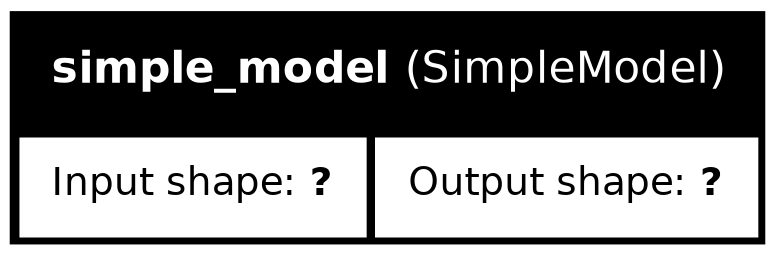

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.utils import plot_model

# Define a simple model with multiple inputs
class SimpleModel(Model):
    def __init__(self):
        super(SimpleModel, self).__init__()
        self.embedding = layers.Embedding(input_dim=100, output_dim=16)
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(32, activation='relu')
        self.dense2 = layers.Dense(1, activation='sigmoid')

    def call(self, inputs):
        x = self.embedding(inputs)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

# Instantiate the model
model = SimpleModel()

# Build the model by calling it on dummy input
dummy_input = tf.zeros((1, 10), dtype=tf.int32)  # shape: (batch_size, sequence_length)
_ = model(dummy_input)  # triggers model building

# Plot the model
plot_model(model, to_file='simple_model.png', show_shapes=True, show_layer_names=True)


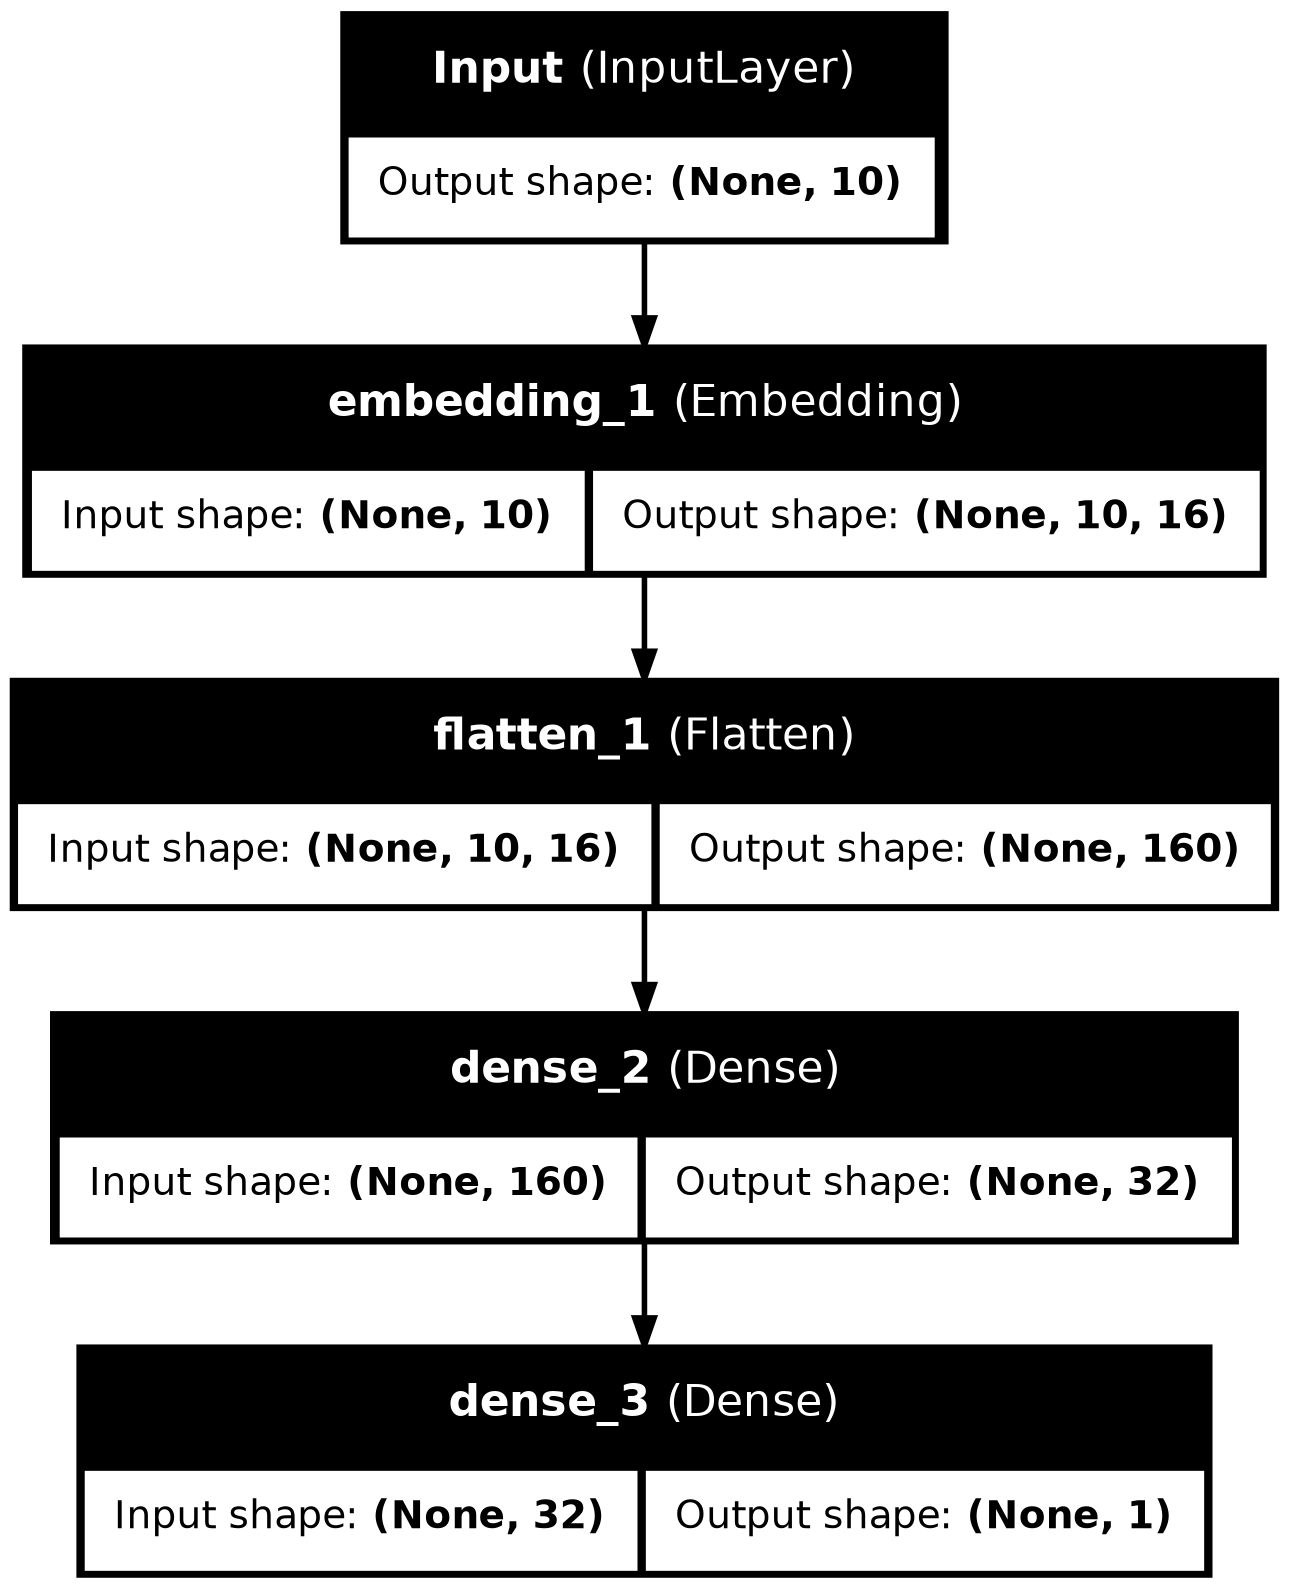

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers, Model

# Define model using Functional API
inputs = tf.keras.Input(shape=(10,), dtype='int32', name='Input')
x = layers.Embedding(input_dim=100, output_dim=16)(inputs)
x = layers.Flatten()(x)
x = layers.Dense(32, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)

model = Model(inputs=inputs, outputs=outputs, name='simple_model')

# Plot and save the model architecture
plot_model(model, to_file='simple_model.png', show_shapes=True, show_layer_names=True)


In [1]:
import sys
import os
# sys.path.append(os.path.abspath(os.path.join(os.path.dirname(__file__), '../')))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))
# for use with subsets
from models.morning_stars_v1.beta.v1_mha_1024_res import TCR_Epitope_Transformer

# Initialize model
model = TCR_Epitope_Transformer(
    embed_dim=128,
    num_heads=4,
    num_layers=2,
    max_tcr_length=43,
    max_epitope_length=43,
    dropout=0.1,
    classifier_hidden_dim=64
)

from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


2025-05-01 15:58:22.486626: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746115102.804393  107477 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746115102.887326  107477 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746115103.665126  107477 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746115103.665175  107477 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746115103.665177  107477 computation_placer.cc:177] computation placer alr

AttributeError: 'TCR_Epitope_Transformer' object has no attribute 'built'

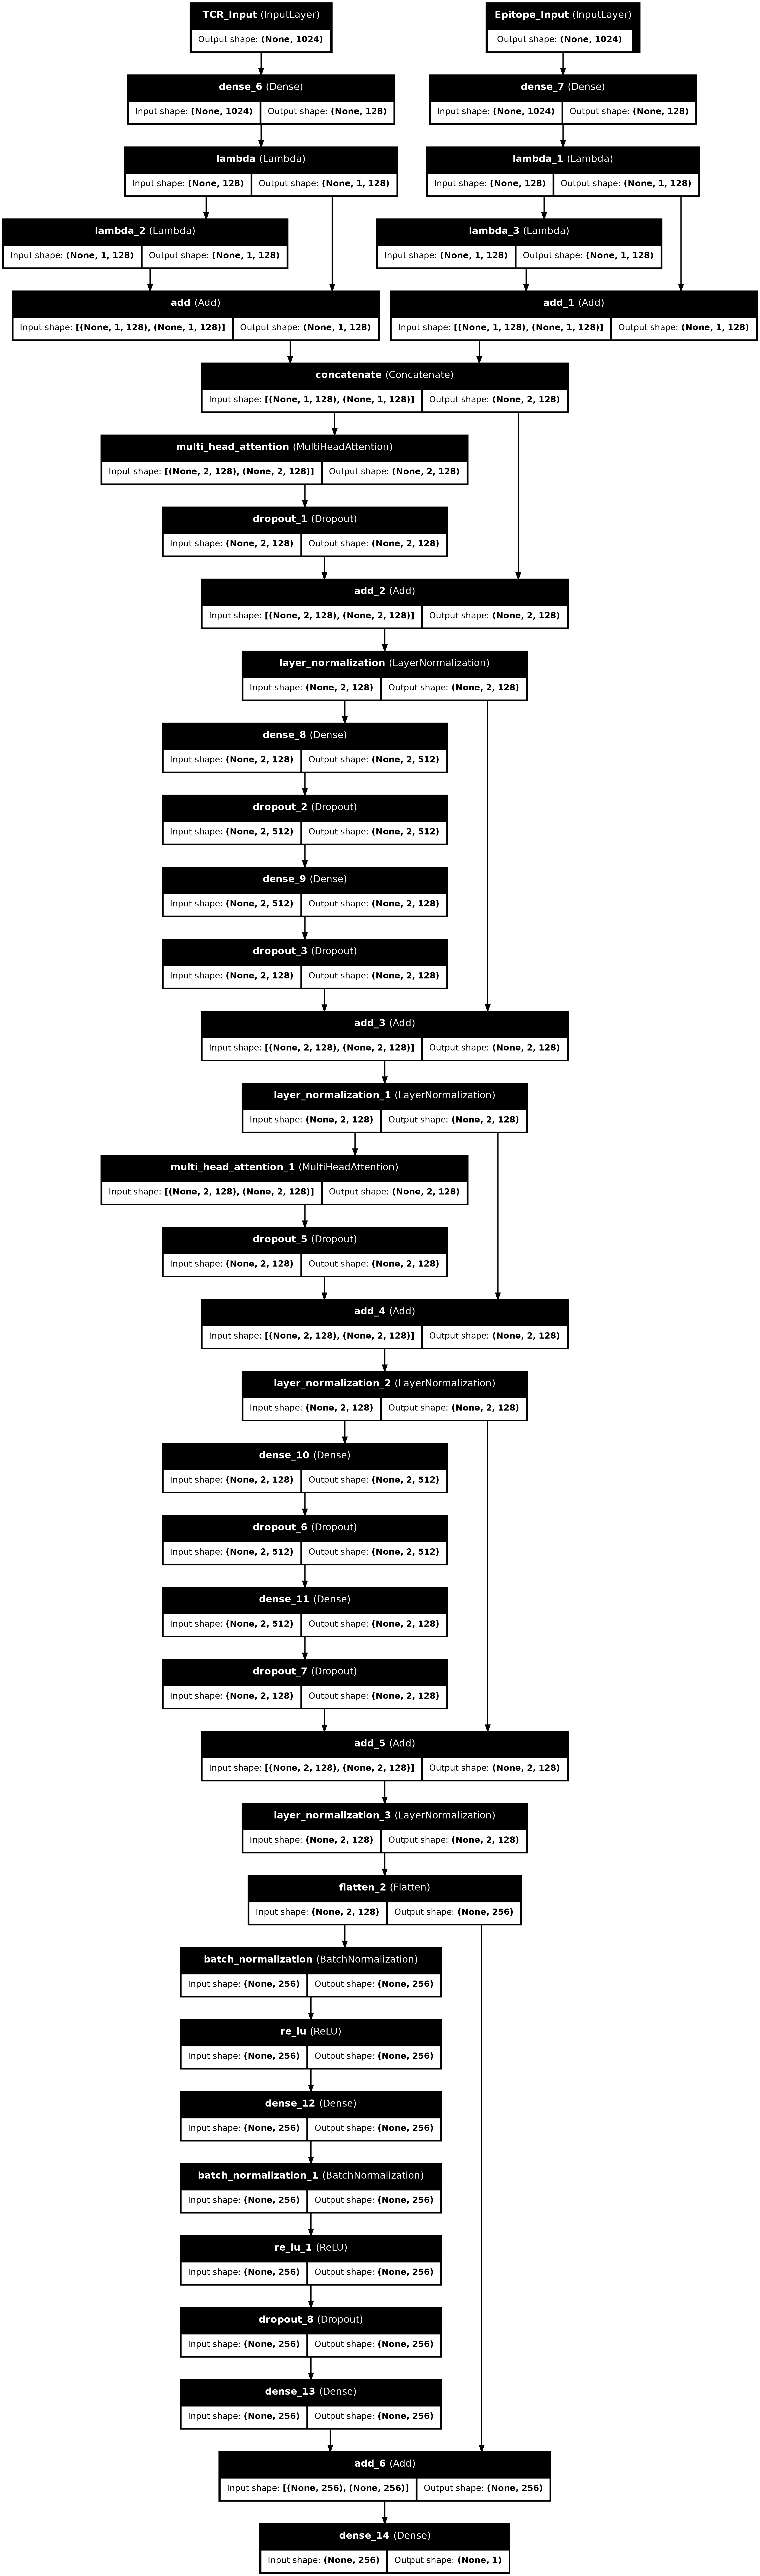

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Lambda

def ResidualBlock(hidden_dim, dropout_rate):
    def block(x):
        shortcut = x
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Dense(hidden_dim)(x)
        x = layers.BatchNormalization()(x)
        x = layers.ReLU()(x)
        x = layers.Dropout(dropout_rate)(x)
        x = layers.Dense(hidden_dim)(x)
        return layers.Add()([shortcut, x])
    return block

def AttentionBlock(embed_dim, num_heads, dropout_rate):
    def block(x):
        attn_output = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(x, x)
        x = layers.Add()([x, layers.Dropout(dropout_rate)(attn_output)])
        x = layers.LayerNormalization()(x)
        ff = layers.Dense(embed_dim * 4, activation='relu')(x)
        ff = layers.Dropout(dropout_rate)(ff)
        ff = layers.Dense(embed_dim)(ff)
        x = layers.Add()([x, layers.Dropout(dropout_rate)(ff)])
        return layers.LayerNormalization()(x)
    return block

def build_model(embed_dim=128, num_heads=4, num_layers=2, max_tcr_len=43, max_epi_len=43, dropout=0.1):
    input_tcr = Input(shape=(1024,), name="TCR_Input")
    input_epi = Input(shape=(1024,), name="Epitope_Input")

    # Linear "embedding"
    tcr_emb = layers.Dense(embed_dim)(input_tcr)
    epi_emb = layers.Dense(embed_dim)(input_epi)

    # Expand dims to simulate sequence (batch_size, seq_len=1, embed_dim)
    tcr_seq = Lambda(lambda x: tf.expand_dims(x, axis=1))(tcr_emb)
    epi_seq = Lambda(lambda x: tf.expand_dims(x, axis=1))(epi_emb)

    # Positional encodings as simple constants (not learnable here)
    tcr_pos = Lambda(lambda x: tf.ones_like(x))(tcr_seq)
    epi_pos = Lambda(lambda x: tf.ones_like(x))(epi_seq)

    tcr_seq = layers.Add()([tcr_seq, tcr_pos])
    epi_seq = layers.Add()([epi_seq, epi_pos])

    x = layers.Concatenate(axis=1)([tcr_seq, epi_seq])  # shape: (batch_size, 2, embed_dim)

    for _ in range(num_layers):
        x = AttentionBlock(embed_dim, num_heads, dropout)(x)

    x = layers.Flatten()(x)

    x = ResidualBlock(x.shape[-1], dropout)(x)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[input_tcr, input_epi], outputs=output, name="TCR_Epitope_Transformer")
    return model

model = build_model()
plot_model(model, to_file="tcr_transformer.png", show_shapes=True, show_layer_names=True)


### Hiddenlayer

In [3]:
import torch
import torch.nn as nn
import hiddenlayer as hl

# Example dummy model
model = nn.Sequential(
    nn.Linear(10, 20),
    nn.ReLU(),
    nn.Linear(20, 5)
)

dummy_input = torch.zeros(1, 10)
hl_graph = hl.build_graph(model, dummy_input)
hl_graph.save("simple_model", format="png")


AttributeError: module 'torch.onnx' has no attribute '_optimize_trace'

In [2]:
import hiddenlayer as hl

# Assume `model` is your PyTorch model and `dummy_input` is your input tensor
dummy_input = torch.zeros(43, 1024)  # adjust based on input shape
hl_graph = hl.build_graph(model, dummy_input)
hl_graph = hl_graph.clean()  # optional: removes unused or redundant nodes
hl_graph.save("model_hl", format="png")  # saves model_hl.png


ModuleNotFoundError: No module named 'hiddenlayer'